# Librerías

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import itertools

# Ingesta de datos

## Dataset principal

In [2]:
df = pd.read_excel("Data/consolidado_oficial_ixc.xlsx", sheet_name='Masa cotizada').iloc[:174]

# Preprocesamiento

## Acciones

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha Rem    174 non-null    datetime64[ns]
 1   Fecha Proc   174 non-null    datetime64[ns]
 2   Valor Real   174 non-null    float64       
 3   Enero*       7 non-null      float64       
 4   Febrero*     0 non-null      float64       
 5   Marzo*       0 non-null      float64       
 6   Abril*       0 non-null      float64       
 7   Mayo*        0 non-null      float64       
 8   Junio*       0 non-null      float64       
 9   Julio*       0 non-null      float64       
 10  Agosto*      0 non-null      float64       
 11  Septiembre*  0 non-null      float64       
 12  Octubre*     0 non-null      float64       
 13  Noviembre*   0 non-null      float64       
 14  Diciembre*   0 non-null      float64       
 15  Unnamed: 15  0 non-null      float64       
 16  Valores 

,Fecha Rem,Fecha Proc,Valor Real,Enero*,Febrero*,Marzo*,Abril*,Mayo*,Junio*,Julio*,...,Unnamed: 15,Valores,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,2011-01-01,2011-02-01,1429251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,2.025000e+03
1,2011-02-01,2011-03-01,1435551.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Enero,2184240.0,2235320.0,2279197.0,2160755.0,2288152.0,2356586.0,2342522.0,2.407450e+06
2,2011-03-01,2011-04-01,1455955.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Febrero,2156968.0,2262246.0,2215997.0,2116774.0,2255539.0,2304282.0,2293290.0,2.372379e+06
3,2011-04-01,2011-05-01,1451485.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Marzo,2158447.0,2197412.0,2230631.0,2133416.0,2276727.0,2309512.0,2256087.0,2.351039e+06
4,2011-05-01,2011-06-01,1455499.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Abril,2159203.0,2206039.0,2203012.0,2158661.0,2273255.0,2293962.0,2304064.0,2.329991e+06


In [4]:
df.rename(columns={"Valor Real": "masa_museg"}, inplace=True)

In [5]:
df.rename(columns={"Fecha Proc": "fecha"}, inplace=True)

In [6]:
df.tail()

,Fecha Rem,fecha,masa_museg,Enero*,Febrero*,Marzo*,Abril*,Mayo*,Junio*,Julio*,...,Unnamed: 15,Valores,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
169,2025-02-01,2025-03-01,2316977.0,2.351039e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,2025-03-01,2025-04-01,2321725.0,2.329991e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,2025-04-01,2025-05-01,2315979.0,2.298322e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,2025-05-01,2025-06-01,2271964.0,2.274677e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,2025-06-01,2025-07-01,2293210.0,2.278532e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# # ELimino la ultima fila
# df = df.iloc[:-1]

In [7]:
df.tail()

,Fecha Rem,fecha,masa_museg,Enero*,Febrero*,Marzo*,Abril*,Mayo*,Junio*,Julio*,...,Unnamed: 15,Valores,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
169,2025-02-01,2025-03-01,2316977.0,2.351039e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,2025-03-01,2025-04-01,2321725.0,2.329991e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,2025-04-01,2025-05-01,2315979.0,2.298322e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,2025-05-01,2025-06-01,2271964.0,2.274677e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,2025-06-01,2025-07-01,2293210.0,2.278532e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# df['prcn_ano'] = df['prcn_ano'].astype(str)
# df['prcn_mes'] = df['prcn_mes'].astype(str).str.zfill(2)  # Asegurarse de que el mes tenga dos dígitos
# df['fecha'] = pd.to_datetime(df['prcn_ano'] + '-' + df['prcn_mes'] + '-01')

### Tendecia

In [8]:
# Realizar la descomposición de la serie temporal
descomposicion = seasonal_decompose(df['masa_museg'], model='multiplicative', period=12)

# Crear el gráfico base con los datos originales
fig = px.line(df, x='fecha', y='masa_museg', title="Accidentes de Trabajo - Tendencia de Descomposición", labels={'masa_museg': 'masa_museg', 'fecha': 'fecha'})

# Añadir la tendencia de la descomposición al gráfico
fig.add_trace(go.Scatter(x=df['fecha'], y=descomposicion.trend, mode='lines', name='Tendencia (Descomposición)', line=dict(color='red', dash='dash')))

# Ajustar el diseño del gráfico
fig.update_layout(
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=40, r=40, t=40, b=40)
)

fig.show()

- Octubre 2019
- Octubre 2020
- Febrero 2023

Posibilidad* Agregar chanhepoint en Abril 2024 (solo para proyeccion, no se puede sobre datos de prueba)

In [9]:
db = df[['fecha', 'masa_museg']]

In [16]:
# db = db.reset_index(drop=True)

In [10]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   fecha       174 non-null    datetime64[ns]
 1   masa_museg  174 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [18]:
# db = db[db['fecha'] >= '2020-01-01']

In [11]:
db.describe()

,fecha,masa_museg
count,174,1.740000e+02
mean,2018-04-16 16:49:39.310344704,2.043022e+06
min,2011-02-01 00:00:00,1.429251e+06
25%,2014-09-08 12:00:00,1.918473e+06
50%,2018-04-16 00:00:00,2.084844e+06
75%,2021-11-23 12:00:00,2.232148e+06
max,2025-07-01 00:00:00,2.411337e+06
std,NaN,2.253881e+05


# Procesamiento

## Sin regresores económicos

### Backtesting

In [12]:
db.tail()

,fecha,masa_museg
169,2025-03-01,2316977.0
170,2025-04-01,2321725.0
171,2025-05-01,2315979.0
172,2025-06-01,2271964.0
173,2025-07-01,2293210.0


In [13]:
db = db[db['fecha']>='2016-01-01']

In [14]:
db.info()
db.head()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 59 to 173
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   fecha       115 non-null    datetime64[ns]
 1   masa_museg  115 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 KB


,fecha,masa_museg
59,2016-01-01,2008395.0
60,2016-02-01,2001675.0
61,2016-03-01,1990060.0
62,2016-04-01,2011488.0
63,2016-05-01,2045045.0


In [23]:
# # --------------------------------------------------------------------------------
# # IMPORTACIONES
# # --------------------------------------------------------------------------------
# import pandas as pd
# import numpy as np
# from prophet import Prophet
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import itertools
# import matplotlib.pyplot as plt
# import traceback

# # --------------------------------------------------------------------------------
# # PASO 1: PREPARAR LOS DATOS
# # --------------------------------------------------------------------------------
# db_r = db.copy()  # <--- reemplaza con tu DataFrame real
# db_r.reset_index(drop=True, inplace=True)

# db_r['Periodo'] = pd.to_datetime(db_r['fecha'])
# db_r.set_index('Periodo', inplace=True)
# db_r = db_r[['masa_museg']]

# # --------------------------------------------------------------------------------
# # DEFINICIÓN DE PERÍODO DE ENTRENAMIENTO
# # --------------------------------------------------------------------------------
# df_train = db_r.loc['2016-01-01':'2023-12-01']
# df_train_prophet = df_train.reset_index().rename(columns={'Periodo': 'ds', 'masa_museg': 'y'})

# # --------------------------------------------------------------------------------
# # DEFINIMOS CHANGEPOINTS MANUALES Y GRILLA DE HIPERPARÁMETROS
# # --------------------------------------------------------------------------------
# changepoints_manuales = ['2019-10-01', '2020-10-01', '2023-02-01']

# param_grid = {
#     'changepoint_prior_scale': [0.005, 0.01, 0.02],
#     'seasonality_prior_scale': [0.1, 0.5],
#     'seasonality_mode': ['additive', 'multiplicative']
# }
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

# # --------------------------------------------------------------------------------
# # VARIABLES PARA ALMACENAR RESULTADOS
# # --------------------------------------------------------------------------------
# best_params_auto = None
# best_rmse_auto = float('inf')
# best_mae_auto = float('inf')

# best_params_manual = None
# best_rmse_manual = float('inf')
# best_mae_manual = float('inf')

# best_params_comb = None
# best_rmse_comb = float('inf')
# best_mae_comb = float('inf')

# # --------------------------------------------------------------------------------
# # DEFINIR DATOS REALES 2024 PARA EVALUACIÓN
# # --------------------------------------------------------------------------------
# datos_reales_2024 = db_r.loc['2024-01-01':'2025-01-01', 'masa_museg']

# # --------------------------------------------------------------------------------
# # BÚSQUEDA DE HIPERPARÁMETROS (GRID SEARCH)
# # --------------------------------------------------------------------------------
# for params in all_params:
#     try:
#         # -----------------------------------------------------------
#         # Modelo con changepoints automáticos
#         # -----------------------------------------------------------
#         modelo_auto = Prophet(**params)
#         modelo_auto.fit(df_train_prophet)
        
#         # Generamos futuro: 12 meses desde el último punto de entrenamiento
#         futuro_auto = modelo_auto.make_future_dataframe(periods=14, freq='MS') #Aquí va la cantidad de periodos que se quieren predecir (misma cantidad de meses reales para el testeo)(+1)
#         predicciones_auto = modelo_auto.predict(futuro_auto)
        
#         predicciones_alineadas_auto = predicciones_auto.set_index('ds').loc[datos_reales_2024.index]
#         if predicciones_alineadas_auto.empty:
#             print(f"Advertencia: Predicciones automáticas vacías con params={params}")
#             continue
        
#         # Calcular MSE y luego RMSE a mano (por versión sklearn antigua)
#         mse_auto = mean_squared_error(datos_reales_2024, predicciones_alineadas_auto['yhat'])
#         rmse_auto = np.sqrt(mse_auto)
#         mae_auto = mean_absolute_error(datos_reales_2024, predicciones_alineadas_auto['yhat'])
        
#         if rmse_auto < best_rmse_auto:
#             best_rmse_auto = rmse_auto
#             best_mae_auto = mae_auto
#             best_params_auto = params

#         # -----------------------------------------------------------
#         # Modelo con changepoints manuales
#         # -----------------------------------------------------------
#         modelo_manual = Prophet(changepoints=changepoints_manuales, **params)
#         modelo_manual.fit(df_train_prophet)
        
#         futuro_manual = modelo_manual.make_future_dataframe(periods=14, freq='MS')
#         predicciones_manual = modelo_manual.predict(futuro_manual)
        
#         predicciones_alineadas_manual = predicciones_manual.set_index('ds').loc[datos_reales_2024.index]
#         if predicciones_alineadas_manual.empty:
#             print(f"Advertencia: Predicciones manuales vacías con params={params}")
#             continue
        
#         mse_manual = mean_squared_error(datos_reales_2024, predicciones_alineadas_manual['yhat'])
#         rmse_manual = np.sqrt(mse_manual)
#         mae_manual = mean_absolute_error(datos_reales_2024, predicciones_alineadas_manual['yhat'])
        
#         if rmse_manual < best_rmse_manual:
#             best_rmse_manual = rmse_manual
#             best_mae_manual = mae_manual
#             best_params_manual = params
            
#         # -----------------------------------------------------------
#         # Modelo con changepoints automáticos + manuales
#         # -----------------------------------------------------------
#         modelo_comb_temp = Prophet(**params)
#         modelo_comb_temp.fit(df_train_prophet)
        
#         changepoints_auto = modelo_comb_temp.changepoints
#         changepoints_manuales_dt = pd.to_datetime(changepoints_manuales)
        
#         todos_changepoints = pd.concat([changepoints_auto, pd.Series(changepoints_manuales_dt)])
#         todos_changepoints = todos_changepoints.sort_values().drop_duplicates()

#         modelo_comb = Prophet(changepoints=todos_changepoints, **params)
#         modelo_comb.fit(df_train_prophet)
        
#         futuro_comb = modelo_comb.make_future_dataframe(periods=14, freq='MS')
#         predicciones_comb = modelo_comb.predict(futuro_comb)
        
#         predicciones_alineadas_comb = predicciones_comb.set_index('ds').loc[datos_reales_2024.index]
#         if predicciones_alineadas_comb.empty:
#             print(f"Advertencia: Predicciones combinadas vacías con params={params}")
#             continue
        
#         mse_comb = mean_squared_error(datos_reales_2024, predicciones_alineadas_comb['yhat'])
#         rmse_comb = np.sqrt(mse_comb)
#         mae_comb = mean_absolute_error(datos_reales_2024, predicciones_alineadas_comb['yhat'])
        
#         if rmse_comb < best_rmse_comb:
#             best_rmse_comb = rmse_comb
#             best_mae_comb = mae_comb
#             best_params_comb = params

#     except Exception as e:
#         print(f"Error con los parámetros {params}:")
#         print(traceback.format_exc())
#         continue

# # --------------------------------------------------------------------------------
# # VERIFICAR SI TENEMOS PARÁMETROS ÓPTIMOS
# # --------------------------------------------------------------------------------
# if best_params_auto is None or best_params_manual is None or best_params_comb is None:
#     print("Al menos uno de los conjuntos de parámetros no tiene una configuración válida.")
#     if best_params_auto is None:
#         best_params_auto = {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive'}
#     if best_params_manual is None:
#         best_params_manual = {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive'}
#     if best_params_comb is None:
#         best_params_comb = best_params_auto

# # --------------------------------------------------------------------------------
# # CREAR MODELOS FINALES CON LOS MEJORES HIPERPARÁMETROS
# # --------------------------------------------------------------------------------
# mejor_modelo_auto = Prophet(**best_params_auto)
# mejor_modelo_auto.fit(df_train_prophet)

# mejor_modelo_manual = Prophet(changepoints=changepoints_manuales, **best_params_manual)
# mejor_modelo_manual.fit(df_train_prophet)

# temp_model = Prophet(**best_params_comb)
# temp_model.fit(df_train_prophet)
# changepoints_auto_temp = temp_model.changepoints
# todos_cp = pd.concat([changepoints_auto_temp, pd.Series(pd.to_datetime(changepoints_manuales))])
# todos_cp = todos_cp.sort_values().drop_duplicates()

# mejor_modelo_comb = Prophet(changepoints=todos_cp, **best_params_comb)
# mejor_modelo_comb.fit(df_train_prophet)

# # --------------------------------------------------------------------------------
# # PREDICCIONES FINALES PARA 2024
# # --------------------------------------------------------------------------------
# futuro = mejor_modelo_auto.make_future_dataframe(periods=14, freq='MS')
# predicciones_auto = mejor_modelo_auto.predict(futuro)
# predicciones_manual = mejor_modelo_manual.predict(futuro)
# predicciones_comb = mejor_modelo_comb.predict(futuro)

# masa_museg_data_reales_hasta_2024 = db_r.loc[:'2024-12-01']

# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

# # 1) Gráfico: Automáticos
# ax1.plot(predicciones_auto['ds'], predicciones_auto['yhat'], label='Predicciones 2024 (Auto)', color='blue')
# ax1.fill_between(
#     predicciones_auto['ds'], 
#     predicciones_auto['yhat_lower'], 
#     predicciones_auto['yhat_upper'], 
#     color='lightblue', alpha=0.5
# )
# ax1.plot(masa_museg_data_reales_hasta_2024.index, 
#          masa_museg_data_reales_hasta_2024['masa_museg'], 
#          label='Datos Reales hasta 2024', color='red')
# for i, cp in enumerate(mejor_modelo_auto.changepoints):
#     if i == 0:
#         ax1.axvline(x=cp, color='green', linestyle='--', alpha=0.5, label='Changepoint Automático')
#     else:
#         ax1.axvline(x=cp, color='green', linestyle='--', alpha=0.5)
# ax1.axvline(x=pd.to_datetime('2024-01-01'), color='black', linewidth=2, label='Inicio de la predicción')
# ax1.set_title("Modelo con Changepoints Automáticos")
# ax1.set_xlabel("Periodo")
# ax1.set_ylabel("Valor o Métrica")
# ax1.legend()
# ax1.grid(True)

# # 2) Gráfico: Manuales
# ax2.plot(predicciones_manual['ds'], predicciones_manual['yhat'], label='Predicciones 2024 (Manual)', color='blue')
# ax2.fill_between(
#     predicciones_manual['ds'], 
#     predicciones_manual['yhat_lower'], 
#     predicciones_manual['yhat_upper'], 
#     color='lightblue', alpha=0.5
# )
# ax2.plot(masa_museg_data_reales_hasta_2024.index, 
#          masa_museg_data_reales_hasta_2024['masa_museg'], 
#          label='Datos Reales hasta 2024', color='red')
# for i, cp_man in enumerate(changepoints_manuales):
#     if i == 0:
#         ax2.axvline(x=pd.to_datetime(cp_man), color='purple', linestyle='--', linewidth=2, alpha=0.7, label='Changepoint Manual')
#     else:
#         ax2.axvline(x=pd.to_datetime(cp_man), color='purple', linestyle='--', linewidth=2, alpha=0.7)
# ax2.axvline(x=pd.to_datetime('2024-01-01'), color='black', linewidth=2, label='Inicio de la predicción')
# ax2.set_title("Modelo con Changepoints Manuales")
# ax2.set_xlabel("Periodo")
# ax2.set_ylabel("Valor o Métrica")
# ax2.legend()
# ax2.grid(True)

# # 3) Gráfico: Auto + Manual
# ax3.plot(predicciones_comb['ds'], predicciones_comb['yhat'], label='Predicciones 2024 (Auto + Manual)', color='blue')
# ax3.fill_between(
#     predicciones_comb['ds'], 
#     predicciones_comb['yhat_lower'], 
#     predicciones_comb['yhat_upper'], 
#     color='lightblue', alpha=0.5
# )
# ax3.plot(masa_museg_data_reales_hasta_2024.index, 
#          masa_museg_data_reales_hasta_2024['masa_museg'], 
#          label='Datos Reales hasta 2024', color='red')
# all_changepoints = mejor_modelo_comb.changepoints
# for cp_comb in all_changepoints:
#     if cp_comb in pd.to_datetime(changepoints_manuales):
#         ax3.axvline(x=cp_comb, color='purple', linestyle='--', linewidth=2, alpha=0.7, label='Changepoint Manual')
#     else:
#         ax3.axvline(x=cp_comb, color='green', linestyle='--', alpha=0.5, label='Changepoint Automático')
# ax3.axvline(x=pd.to_datetime('2024-01-01'), color='black', linewidth=2, label='Inicio de la predicción')
# ax3.set_title("Modelo con Changepoints Automáticos + Manuales")
# ax3.set_xlabel("Periodo")
# ax3.set_ylabel("Valor o Métrica")
# handles, labels = ax3.get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# ax3.legend(by_label.values(), by_label.keys())
# ax3.grid(True)

# plt.tight_layout()
# plt.show()

# # --------------------------------------------------------------------------------
# # IMPRESIÓN DE RESULTADOS
# # --------------------------------------------------------------------------------
# if best_rmse_auto < best_rmse_manual and best_rmse_auto < best_rmse_comb:
#     print("\nSe recomienda usar el modelo con changepoints automáticos.")
#     print(f"Mejores hiperparámetros: {best_params_auto}")
#     print(f"RMSE: {best_rmse_auto:.4f}, MAE: {best_mae_auto:.4f}")
# elif best_rmse_manual < best_rmse_comb:
#     print("\nSe recomienda usar el modelo con changepoints manuales.")
#     print(f"Mejores hiperparámetros: {best_params_manual}")
#     print(f"RMSE: {best_rmse_manual:.4f}, MAE: {best_mae_manual:.4f}")
# else:
#     print("\nSe recomienda usar el modelo con changepoints automáticos + manuales.")
#     print(f"Mejores hiperparámetros: {best_params_comb}")
#     print(f"RMSE: {best_rmse_comb:.4f}, MAE: {best_mae_comb:.4f}")

# print("\nErrores para las otras combinaciones:")
# print(f"Changepoints Automáticos - RMSE: {best_rmse_auto:.4f}, MAE: {best_mae_auto:.4f}")
# print(f"Changepoints Manuales - RMSE: {best_rmse_manual:.4f}, MAE: {best_mae_manual:.4f}")
# print(f"Changepoints Automáticos + Manuales - RMSE: {best_rmse_comb:.4f}, MAE: {best_mae_comb:.4f}")


**Recomendación:**
Se recomienda usar el modelo con changepoints manuales.

**Mejores hiperparámetros:**
- `changepoint_prior_scale`: 0.5
- `seasonality_prior_scale`: 1.0
- `seasonality_mode`: 'multiplicative'

**Métricas de error del modelo recomendado:**
- RMSE: 26,126.01
- MAE: 24,371.30

**Errores para las otras combinaciones:**

| Configuración                         | RMSE          | MAE            |
|---------------------------------------|---------------|----------------|
| Changepoints Automáticos              | 49,766.09     | 42,194.05      |
| Changepoints Manuales                 | 26,126.01     | 24,371.30      |
| Changepoints Automáticos + Manuales   | 27,410.27     | 24,298.98      |


11:52:09 - cmdstanpy - INFO - Chain [1] start processing
11:52:09 - cmdstanpy - INFO - Chain [1] done processing
11:52:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:52:09 - cmdstanpy - INFO - Chain [1] start processing
11:52:09 - cmdstanpy - INFO - Chain [1] done processing
11:52:09 - cmdstanpy - INFO - Chain [1] start processing
11:52:09 - cmdstanpy - INFO - Chain [1] done processing
11:52:09 - cmdstanpy - INFO - Chain [1] start processing
11:52:09 - cmdstanpy - INFO - Chain [1] done processing
11:52:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:52:09 - cmdstanpy - INFO - Chain [1] start processing
11:52:10 - cmdstanpy - INFO - Chain [1] done processing
11:52:10 - cmdstanpy - INFO - Chain [1] start processing
11:52:10 - cmdstanpy - INFO - Chain [1] done processing
11:52:10 -

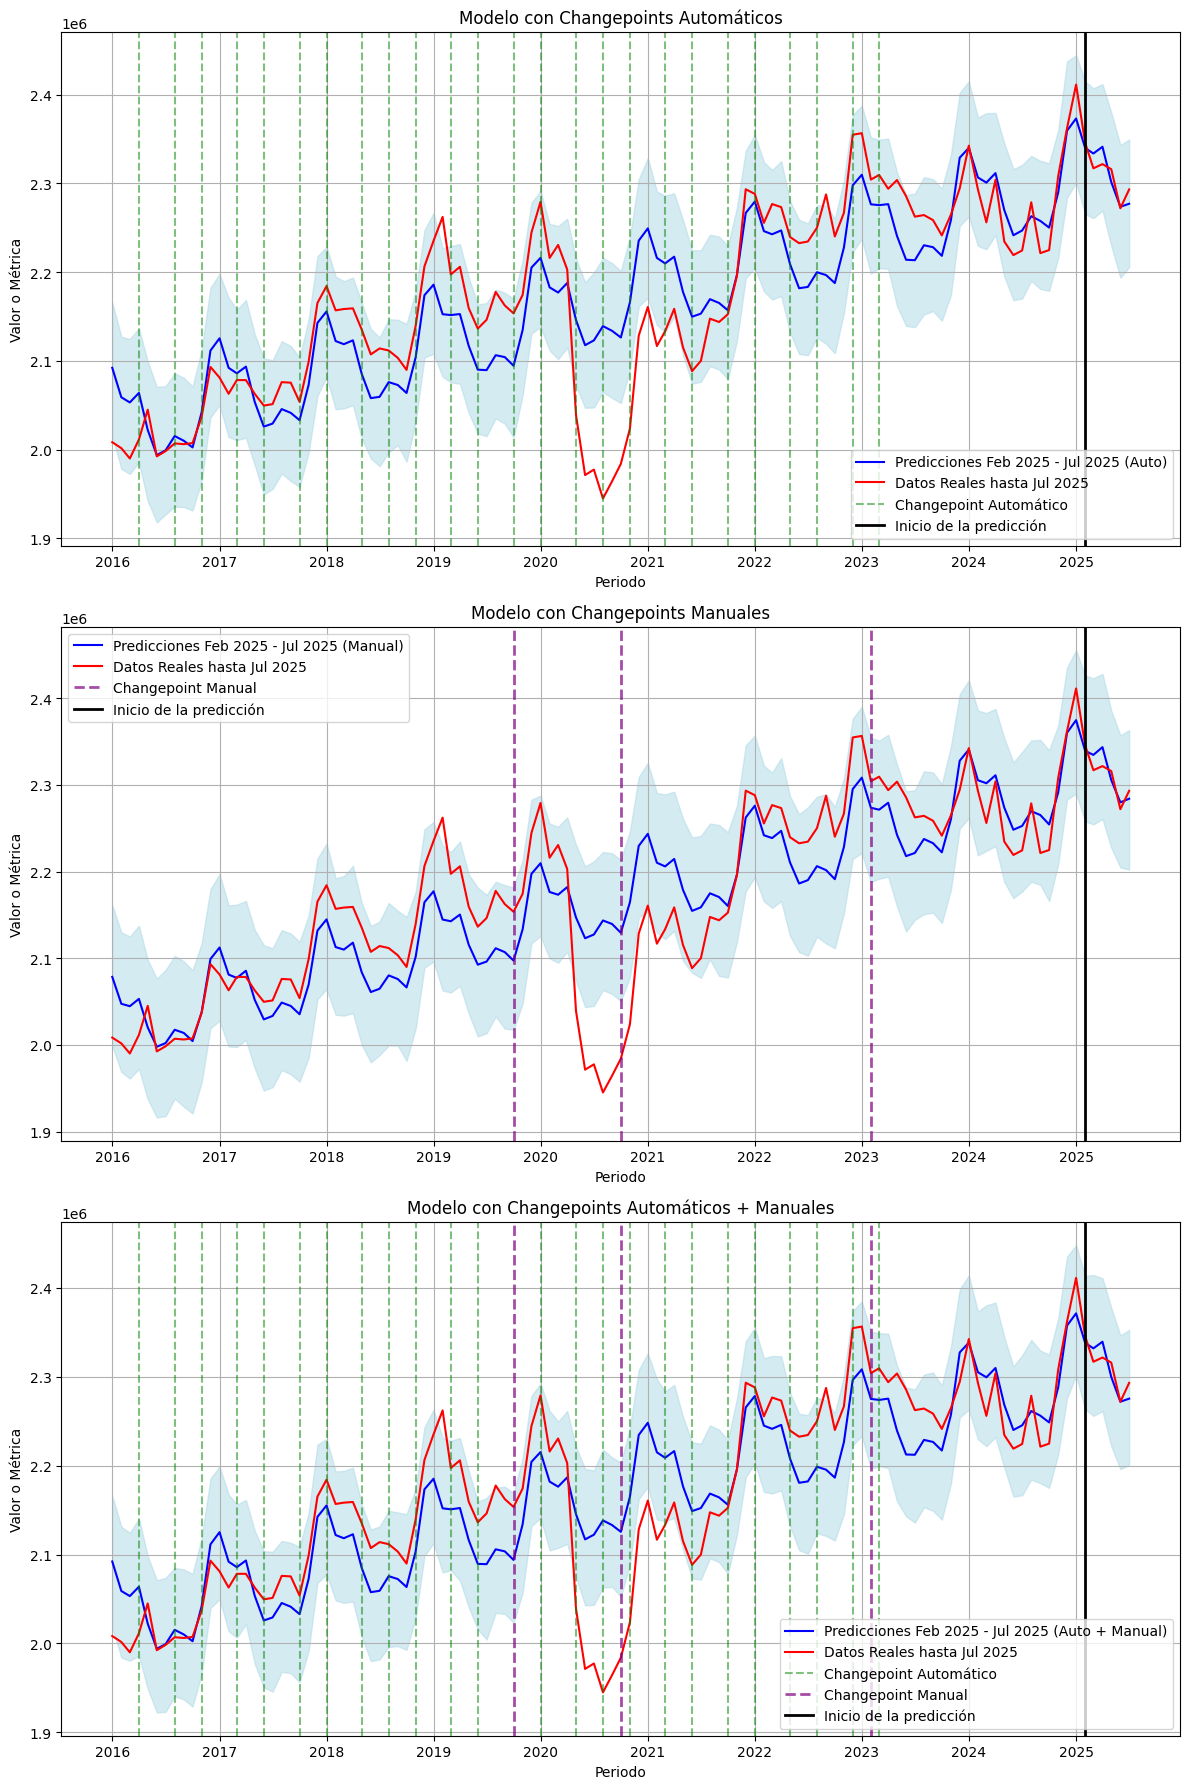


Se recomienda usar el modelo con changepoints manuales.
Mejores hiperparámetros: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.3, 'seasonality_mode': 'multiplicative', 'holidays_prior_scale': 0.01, 'yearly_seasonality': True, 'weekly_seasonality': False}
RMSE: 13436.5103, MAE: 12200.0802

Errores para las otras combinaciones:
Changepoints Automáticos - RMSE: 13936.0205, MAE: 12363.4554
Changepoints Manuales - RMSE: 13436.5103, MAE: 12200.0802
Changepoints Automáticos + Manuales - RMSE: 13981.4720, MAE: 12362.7605


In [15]:
# Probando versión dinámica del código, para evitar actualización manual

# --------------------------------------------------------------------------------
# IMPORTACIONES
# --------------------------------------------------------------------------------
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import itertools
import matplotlib.pyplot as plt
import traceback

# --------------------------------------------------------------------------------
# PASO 1: PREPARAR LOS DATOS
# --------------------------------------------------------------------------------
db_r = db.copy()  
db_r.reset_index(drop=True, inplace=True)

db_r['Periodo'] = pd.to_datetime(db_r['fecha'])
db_r.set_index('Periodo', inplace=True)
db_r = db_r[['masa_museg']]

# --------------------------------------------------------------------------------
# DEFINICIÓN DINÁMICA DE PERÍODO DE ENTRENAMIENTO Y TESTEO
# --------------------------------------------------------------------------------
# Obtener la última fecha disponible en los datos
ultima_fecha = db_r.index.max()

# Calcular la fecha de inicio del testeo (6 meses antes de la última fecha)
inicio_testeo = ultima_fecha - pd.offsets.MonthEnd(6) + pd.offsets.MonthBegin(1)

# Conjunto de entrenamiento: desde el inicio hasta el mes antes del testeo
df_train = db_r.loc['2016-01-01':inicio_testeo - pd.offsets.MonthBegin(1)]
df_train_prophet = df_train.reset_index().rename(columns={'Periodo': 'ds', 'masa_museg': 'y'})

# Conjunto de testeo: últimos 6 meses disponibles
datos_reales_test = db_r.loc[inicio_testeo:ultima_fecha, 'masa_museg']

# --------------------------------------------------------------------------------
# DEFINIMOS CHANGEPOINTS MANUALES Y GRILLA DE HIPERPARÁMETROS
# --------------------------------------------------------------------------------
# changepoints_manuales = ['2019-09-01', '2020-08-01', '2023-08-01']

# param_grid = {
#     'changepoint_prior_scale': [0.005, 0.01, 0.02],
#     'seasonality_prior_scale': [0.1, 0.5],
#     'seasonality_mode': ['additive', 'multiplicative']
# }

changepoints_manuales = ['2019-10-01', '2020-10-01', '2023-02-01']

param_grid = {
    'changepoint_prior_scale': [0.005, 0.01, 0.02],
    'seasonality_prior_scale': [0.1, 0.5],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Grilla ajustada para mayor sensibilidad a los peaks (valores más altos de changepoint_prior_scale y seasonality_prior_scale)
# param_grid = {
#     'changepoint_prior_scale': [0.02, 0.05, 0.1, 0.2],  # valores más altos para mayor flexibilidad en los cambios de tendencia
#     'seasonality_prior_scale': [0.5, 1.0, 2.0],         # mayor capacidad de ajuste a estacionalidades abruptas
#     'seasonality_mode': ['additive', 'multiplicative']
# }

# Grilla ampliada para evaluar más combinaciones y mejorar el ajuste del modelo
param_grid = {
    'changepoint_prior_scale': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2],
    'seasonality_prior_scale': [0.05, 0.1, 0.3, 0.5, 1.0, 2.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'holidays_prior_scale': [0.01, 0.1, 1.0],  # Si no usas holidays, puedes quitar esta línea
    'yearly_seasonality': [True, False],
    'weekly_seasonality': [True, False]
}

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

# --------------------------------------------------------------------------------
# VARIABLES PARA ALMACENAR RESULTADOS
# --------------------------------------------------------------------------------
best_params_auto = None
best_rmse_auto = float('inf')
best_mae_auto = float('inf')

best_params_manual = None
best_rmse_manual = float('inf')
best_mae_manual = float('inf')

best_params_comb = None
best_rmse_comb = float('inf')
best_mae_comb = float('inf')

# --------------------------------------------------------------------------------
# BÚSQUEDA DE HIPERPARÁMETROS (GRID SEARCH)
# --------------------------------------------------------------------------------
for params in all_params:
    try:
        # -----------------------------------------------------------
        # Modelo con changepoints automáticos
        # -----------------------------------------------------------
        modelo_auto = Prophet(**params)
        modelo_auto.fit(df_train_prophet)
        
        # Generamos futuro: 6 meses desde el último punto de entrenamiento
        futuro_auto = modelo_auto.make_future_dataframe(periods=6, freq='MS')
        predicciones_auto = modelo_auto.predict(futuro_auto)
        
        predicciones_alineadas_auto = predicciones_auto.set_index('ds').loc[datos_reales_test.index]
        if predicciones_alineadas_auto.empty:
            print(f"Advertencia: Predicciones automáticas vacías con params={params}")
            continue
        
        # Calcular MSE y luego RMSE a mano (por versión sklearn antigua)
        mse_auto = mean_squared_error(datos_reales_test, predicciones_alineadas_auto['yhat'])
        rmse_auto = np.sqrt(mse_auto)
        mae_auto = mean_absolute_error(datos_reales_test, predicciones_alineadas_auto['yhat'])
        
        if rmse_auto < best_rmse_auto:
            best_rmse_auto = rmse_auto
            best_mae_auto = mae_auto
            best_params_auto = params

        # -----------------------------------------------------------
        # Modelo con changepoints manuales
        # -----------------------------------------------------------
        modelo_manual = Prophet(changepoints=changepoints_manuales, **params)
        modelo_manual.fit(df_train_prophet)
        
        futuro_manual = modelo_manual.make_future_dataframe(periods=6, freq='MS')
        predicciones_manual = modelo_manual.predict(futuro_manual)
        
        predicciones_alineadas_manual = predicciones_manual.set_index('ds').loc[datos_reales_test.index]
        if predicciones_alineadas_manual.empty:
            print(f"Advertencia: Predicciones manuales vacías con params={params}")
            continue
        
        mse_manual = mean_squared_error(datos_reales_test, predicciones_alineadas_manual['yhat'])
        rmse_manual = np.sqrt(mse_manual)
        mae_manual = mean_absolute_error(datos_reales_test, predicciones_alineadas_manual['yhat'])
        
        if rmse_manual < best_rmse_manual:
            best_rmse_manual = rmse_manual
            best_mae_manual = mae_manual
            best_params_manual = params
            
        # -----------------------------------------------------------
        # Modelo con changepoints automáticos + manuales
        # -----------------------------------------------------------
        modelo_comb_temp = Prophet(**params)
        modelo_comb_temp.fit(df_train_prophet)
        
        changepoints_auto = modelo_comb_temp.changepoints
        changepoints_manuales_dt = pd.to_datetime(changepoints_manuales)
        
        todos_changepoints = pd.concat([changepoints_auto, pd.Series(changepoints_manuales_dt)])
        todos_changepoints = todos_changepoints.sort_values().drop_duplicates()

        modelo_comb = Prophet(changepoints=todos_changepoints, **params)
        modelo_comb.fit(df_train_prophet)
        
        futuro_comb = modelo_comb.make_future_dataframe(periods=6, freq='MS')
        predicciones_comb = modelo_comb.predict(futuro_comb)
        
        predicciones_alineadas_comb = predicciones_comb.set_index('ds').loc[datos_reales_test.index]
        if predicciones_alineadas_comb.empty:
            print(f"Advertencia: Predicciones combinadas vacías con params={params}")
            continue
        
        mse_comb = mean_squared_error(datos_reales_test, predicciones_alineadas_comb['yhat'])
        rmse_comb = np.sqrt(mse_comb)
        mae_comb = mean_absolute_error(datos_reales_test, predicciones_alineadas_comb['yhat'])
        
        if rmse_comb < best_rmse_comb:
            best_rmse_comb = rmse_comb
            best_mae_comb = mae_comb
            best_params_comb = params

    except Exception as e:
        print(f"Error con los parámetros {params}:")
        print(traceback.format_exc())
        continue

# --------------------------------------------------------------------------------
# VERIFICAR SI TENEMOS PARÁMETROS ÓPTIMOS
# --------------------------------------------------------------------------------
if best_params_auto is None or best_params_manual is None or best_params_comb is None:
    print("Al menos uno de los conjuntos de parámetros no tiene una configuración válida.")
    if best_params_auto is None:
        best_params_auto = {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive'}
    if best_params_manual is None:
        best_params_manual = {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive'}
    if best_params_comb is None:
        best_params_comb = best_params_auto

# --------------------------------------------------------------------------------
# CREAR MODELOS FINALES CON LOS MEJORES HIPERPARÁMETROS
# --------------------------------------------------------------------------------
mejor_modelo_auto = Prophet(**best_params_auto)
mejor_modelo_auto.fit(df_train_prophet)

mejor_modelo_manual = Prophet(changepoints=changepoints_manuales, **best_params_manual)
mejor_modelo_manual.fit(df_train_prophet)

temp_model = Prophet(**best_params_comb)
temp_model.fit(df_train_prophet)
changepoints_auto_temp = temp_model.changepoints
todos_cp = pd.concat([changepoints_auto_temp, pd.Series(pd.to_datetime(changepoints_manuales))])
todos_cp = todos_cp.sort_values().drop_duplicates()

mejor_modelo_comb = Prophet(changepoints=todos_cp, **best_params_comb)
mejor_modelo_comb.fit(df_train_prophet)

# --------------------------------------------------------------------------------
# PREDICCIONES FINALES PARA LOS ÚLTIMOS 6 MESES
# --------------------------------------------------------------------------------
futuro = mejor_modelo_auto.make_future_dataframe(periods=6, freq='MS')
predicciones_auto = mejor_modelo_auto.predict(futuro)
predicciones_manual = mejor_modelo_manual.predict(futuro)
predicciones_comb = mejor_modelo_comb.predict(futuro)

masa_museg_data_reales_hasta_test = db_r.loc[:ultima_fecha]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

# 1) Gráfico: Automáticos
ax1.plot(predicciones_auto['ds'], predicciones_auto['yhat'], label=f'Predicciones {inicio_testeo.strftime("%b %Y")} - {ultima_fecha.strftime("%b %Y")} (Auto)', color='blue')
ax1.fill_between(
    predicciones_auto['ds'], 
    predicciones_auto['yhat_lower'], 
    predicciones_auto['yhat_upper'], 
    color='lightblue', alpha=0.5
)
ax1.plot(masa_museg_data_reales_hasta_test.index, 
         masa_museg_data_reales_hasta_test['masa_museg'], 
         label=f'Datos Reales hasta {ultima_fecha.strftime("%b %Y")}', color='red')
for i, cp in enumerate(mejor_modelo_auto.changepoints):
    if i == 0:
        ax1.axvline(x=cp, color='green', linestyle='--', alpha=0.5, label='Changepoint Automático')
    else:
        ax1.axvline(x=cp, color='green', linestyle='--', alpha=0.5)
ax1.axvline(x=inicio_testeo, color='black', linewidth=2, label='Inicio de la predicción')
ax1.set_title("Modelo con Changepoints Automáticos")
ax1.set_xlabel("Periodo")
ax1.set_ylabel("Valor o Métrica")
ax1.legend()
ax1.grid(True)

# 2) Gráfico: Manuales
ax2.plot(predicciones_manual['ds'], predicciones_manual['yhat'], label=f'Predicciones {inicio_testeo.strftime("%b %Y")} - {ultima_fecha.strftime("%b %Y")} (Manual)', color='blue')
ax2.fill_between(
    predicciones_manual['ds'], 
    predicciones_manual['yhat_lower'], 
    predicciones_manual['yhat_upper'], 
    color='lightblue', alpha=0.5
)
ax2.plot(masa_museg_data_reales_hasta_test.index, 
         masa_museg_data_reales_hasta_test['masa_museg'], 
         label=f'Datos Reales hasta {ultima_fecha.strftime("%b %Y")}', color='red')
for i, cp_man in enumerate(changepoints_manuales):
    if i == 0:
        ax2.axvline(x=pd.to_datetime(cp_man), color='purple', linestyle='--', linewidth=2, alpha=0.7, label='Changepoint Manual')
    else:
        ax2.axvline(x=pd.to_datetime(cp_man), color='purple', linestyle='--', linewidth=2, alpha=0.7)
ax2.axvline(x=inicio_testeo, color='black', linewidth=2, label='Inicio de la predicción')
ax2.set_title("Modelo con Changepoints Manuales")
ax2.set_xlabel("Periodo")
ax2.set_ylabel("Valor o Métrica")
ax2.legend()
ax2.grid(True)

# 3) Gráfico: Auto + Manual
ax3.plot(predicciones_comb['ds'], predicciones_comb['yhat'], label=f'Predicciones {inicio_testeo.strftime("%b %Y")} - {ultima_fecha.strftime("%b %Y")} (Auto + Manual)', color='blue')
ax3.fill_between(
    predicciones_comb['ds'], 
    predicciones_comb['yhat_lower'], 
    predicciones_comb['yhat_upper'], 
    color='lightblue', alpha=0.5
)
ax3.plot(masa_museg_data_reales_hasta_test.index, 
         masa_museg_data_reales_hasta_test['masa_museg'], 
         label=f'Datos Reales hasta {ultima_fecha.strftime("%b %Y")}', color='red')
all_changepoints = mejor_modelo_comb.changepoints
for cp_comb in all_changepoints:
    if cp_comb in pd.to_datetime(changepoints_manuales):
        ax3.axvline(x=cp_comb, color='purple', linestyle='--', linewidth=2, alpha=0.7, label='Changepoint Manual')
    else:
        ax3.axvline(x=cp_comb, color='green', linestyle='--', alpha=0.5, label='Changepoint Automático')
ax3.axvline(x=inicio_testeo, color='black', linewidth=2, label='Inicio de la predicción')
ax3.set_title("Modelo con Changepoints Automáticos + Manuales")
ax3.set_xlabel("Periodo")
ax3.set_ylabel("Valor o Métrica")
handles, labels = ax3.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax3.legend(by_label.values(), by_label.keys())
ax3.grid(True)

plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------------
# IMPRESIÓN DE RESULTADOS
# --------------------------------------------------------------------------------
if best_rmse_auto < best_rmse_manual and best_rmse_auto < best_rmse_comb:
    print("\nSe recomienda usar el modelo con changepoints automáticos.")
    print(f"Mejores hiperparámetros: {best_params_auto}")
    print(f"RMSE: {best_rmse_auto:.4f}, MAE: {best_mae_auto:.4f}")
elif best_rmse_manual < best_rmse_comb:
    print("\nSe recomienda usar el modelo con changepoints manuales.")
    print(f"Mejores hiperparámetros: {best_params_manual}")
    print(f"RMSE: {best_rmse_manual:.4f}, MAE: {best_mae_manual:.4f}")
else:
    print("\nSe recomienda usar el modelo con changepoints automáticos + manuales.")
    print(f"Mejores hiperparámetros: {best_params_comb}")
    print(f"RMSE: {best_rmse_comb:.4f}, MAE: {best_mae_comb:.4f}")

print("\nErrores para las otras combinaciones:")
print(f"Changepoints Automáticos - RMSE: {best_rmse_auto:.4f}, MAE: {best_mae_auto:.4f}")
print(f"Changepoints Manuales - RMSE: {best_rmse_manual:.4f}, MAE: {best_mae_manual:.4f}")
print(f"Changepoints Automáticos + Manuales - RMSE: {best_rmse_comb:.4f}, MAE: {best_mae_comb:.4f}")

In [16]:
db.tail()

,fecha,masa_museg
169,2025-03-01,2316977.0
170,2025-04-01,2321725.0
171,2025-05-01,2315979.0
172,2025-06-01,2271964.0
173,2025-07-01,2293210.0


In [27]:
db = db.reset_index()
db

,index,fecha,masa_museg
0,59,2016-01-01,2008395.0
1,60,2016-02-01,2001675.0
2,61,2016-03-01,1990060.0
3,62,2016-04-01,2011488.0
4,63,2016-05-01,2045045.0
...,...,...,...
109,168,2025-02-01,2345511.0
110,169,2025-03-01,2316977.0
111,170,2025-04-01,2321725.0
112,171,2025-05-01,2315979.0


### Proyección

In [17]:
db.head()

,fecha,masa_museg
59,2016-01-01,2008395.0
60,2016-02-01,2001675.0
61,2016-03-01,1990060.0
62,2016-04-01,2011488.0
63,2016-05-01,2045045.0


In [29]:
# Eliminar las columnas 'level_0' e 'index' si existen en el DataFrame 'db'
# Esto es útil cuando se ha hecho un reset_index() y pandas agrega estas columnas automáticamente.
db = db.drop(columns=[col for col in ['level_0', 'index'] if col in db.columns])


#### Nuevo enfoque

12:01:10 - cmdstanpy - INFO - Chain [1] start processing
12:01:10 - cmdstanpy - INFO - Chain [1] done processing


Usando el modelo con changepoints manuales
Mejores hiperparámetros: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.3, 'seasonality_mode': 'multiplicative', 'holidays_prior_scale': 0.01, 'yearly_seasonality': True, 'weekly_seasonality': False}


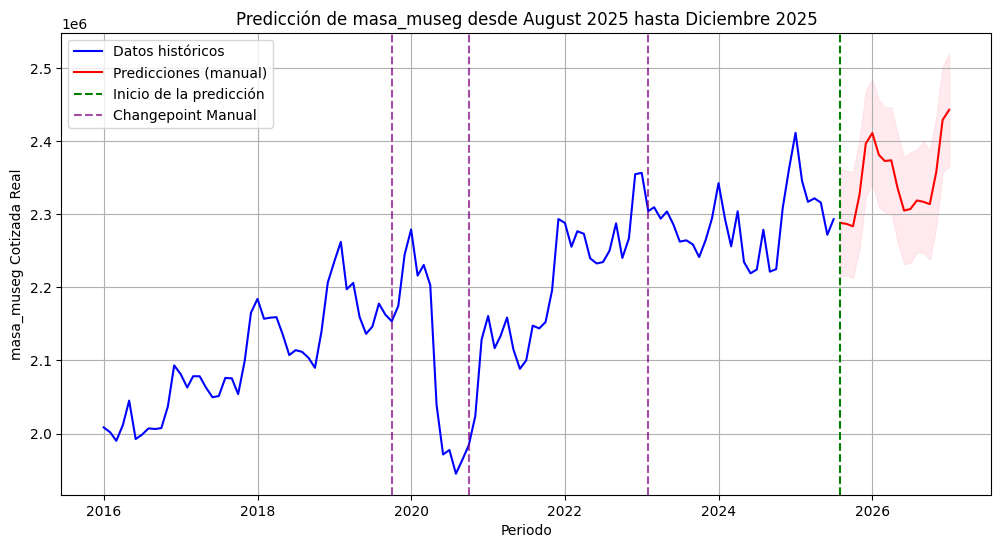


Predicciones desde August 2025 hasta Diciembre 2025:
           ds          yhat    yhat_lower    yhat_upper
0  2025-08-01  2.288298e+06  2.214974e+06  2.362579e+06
1  2025-09-01  2.286695e+06  2.216460e+06  2.359309e+06
2  2025-10-01  2.283447e+06  2.212730e+06  2.357249e+06
3  2025-11-01  2.326732e+06  2.252645e+06  2.402152e+06
4  2025-12-01  2.396766e+06  2.324040e+06  2.468982e+06
5  2026-01-01  2.411109e+06  2.342563e+06  2.485013e+06
6  2026-02-01  2.381308e+06  2.310475e+06  2.455877e+06
7  2026-03-01  2.372798e+06  2.302534e+06  2.445907e+06
8  2026-04-01  2.373811e+06  2.302809e+06  2.446302e+06
9  2026-05-01  2.335729e+06  2.262481e+06  2.410179e+06
10 2026-06-01  2.304976e+06  2.231723e+06  2.378143e+06
11 2026-07-01  2.307192e+06  2.233728e+06  2.384503e+06
12 2026-08-01  2.318839e+06  2.247799e+06  2.388145e+06
13 2026-09-01  2.316966e+06  2.247144e+06  2.399064e+06
14 2026-10-01  2.313790e+06  2.237823e+06  2.386736e+06
15 2026-11-01  2.358073e+06  2.283598e+06  2.43357

In [18]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Usar todos los datos disponibles para el entrenamiento (datos completos de 'masa_museg')
df_train = db.reset_index()  # Reiniciar índice si es necesario

# Preparar los datos para Prophet
df_train_prophet = df_train.rename(columns={'fecha': 'ds', 'masa_museg': 'y'})

# # Definir los changepoints manuales (ya definidos en el backtesting)
# changepoints_manuales = ['2019-09-01', '2020-08-01', '2023-08-01']  # Asegúrate de que coincida con tu backtesting

# Determinar la mejor combinación automáticamente comparando RMSE
if best_rmse_auto < best_rmse_manual and best_rmse_auto < best_rmse_comb:
    print("Usando el modelo con changepoints automáticos")
    print(f"Mejores hiperparámetros: {best_params_auto}")
    mejor_modelo = Prophet(**best_params_auto)
    tipo_modelo = "auto"
elif best_rmse_manual < best_rmse_comb:
    print("Usando el modelo con changepoints manuales")
    print(f"Mejores hiperparámetros: {best_params_manual}")
    mejor_modelo = Prophet(changepoints=changepoints_manuales, **best_params_manual)
    tipo_modelo = "manual"
else:
    print("Usando el modelo con changepoints automáticos + manuales")
    print(f"Mejores hiperparámetros: {best_params_comb}")
    # Paso 1: Ajustar un modelo temporal para obtener changepoints automáticos
    modelo_temp = Prophet(**best_params_comb)
    modelo_temp.fit(df_train_prophet)
    changepoints_automaticos = modelo_temp.changepoints
    # Combinar con changepoints manuales
    changepoints_manuales_datetime = pd.to_datetime(changepoints_manuales)
    todos_changepoints = pd.concat([changepoints_automaticos, pd.Series(changepoints_manuales_datetime)])
    todos_changepoints = todos_changepoints.sort_values().drop_duplicates()
    # Crear el modelo final
    mejor_modelo = Prophet(changepoints=todos_changepoints, **best_params_comb)
    tipo_modelo = "comb"

# Ajustar el modelo con todos los datos disponibles
mejor_modelo.fit(df_train_prophet)

# Calcular dinámicamente cuántos meses proyectar hasta diciembre 2025
ultimo_dato_real = df_train_prophet['ds'].max()
fecha_objetivo = pd.to_datetime('2027-01-01')  # Último mes objetivo
inicio_prediccion = ultimo_dato_real + pd.DateOffset(months=1)

# Calcular el número de meses entre el inicio de la predicción y diciembre 2025
meses_a_proyectar = (fecha_objetivo.year - inicio_prediccion.year) * 12 + (fecha_objetivo.month - inicio_prediccion.month) + 1
if meses_a_proyectar <= 0:
    raise ValueError("El último dato real es posterior a diciembre de 2025. No se requieren predicciones.")

# Generar el DataFrame de fechas futuras
futuro = pd.date_range(start=inicio_prediccion, periods=meses_a_proyectar, freq='MS')
futuro_df = pd.DataFrame({'ds': futuro})

# Hacer las predicciones
predicciones = mejor_modelo.predict(futuro_df)

# Visualizar las predicciones
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_train_prophet['ds'], df_train_prophet['y'], label='Datos históricos', color='blue')
ax.plot(predicciones['ds'], predicciones['yhat'], label=f'Predicciones ({tipo_modelo})', color='red')
ax.fill_between(predicciones['ds'], predicciones['yhat_lower'], predicciones['yhat_upper'], color='pink', alpha=0.3)
ax.axvline(x=inicio_prediccion, color='green', linestyle='--', label='Inicio de la predicción')

# Visualizar changepoints según el tipo de modelo
if tipo_modelo == "auto":
    for cp in mejor_modelo.changepoints:
        ax.axvline(x=cp, color='gray', linestyle='--', alpha=0.5, label='Changepoint Automático')
elif tipo_modelo == "manual":
    for cp in changepoints_manuales:
        ax.axvline(x=pd.to_datetime(cp), color='purple', linestyle='--', alpha=0.7, label='Changepoint Manual')
else:  # comb
    for cp in todos_changepoints:
        if cp in pd.to_datetime(changepoints_manuales):
            ax.axvline(x=cp, color='purple', linestyle='--', alpha=0.7, label='Changepoint Manual')
        else:
            ax.axvline(x=cp, color='gray', linestyle='--', alpha=0.5, label='Changepoint Automático')

# Ajustar título y leyenda
ax.set_title(f"Predicción de masa_museg desde {inicio_prediccion.strftime('%B %Y')} hasta Diciembre 2025")
ax.set_xlabel("Periodo")
ax.set_ylabel("masa_museg Cotizada Real")
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
plt.grid(True)
plt.show()

# Imprimir las predicciones
print(f"\nPredicciones desde {inicio_prediccion.strftime('%B %Y')} hasta Diciembre 2025:")
print(predicciones[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

In [19]:
predicciones.info()
predicciones.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          18 non-null     datetime64[ns]
 1   trend                       18 non-null     float64       
 2   yhat_lower                  18 non-null     float64       
 3   yhat_upper                  18 non-null     float64       
 4   trend_lower                 18 non-null     float64       
 5   trend_upper                 18 non-null     float64       
 6   multiplicative_terms        18 non-null     float64       
 7   multiplicative_terms_lower  18 non-null     float64       
 8   multiplicative_terms_upper  18 non-null     float64       
 9   yearly                      18 non-null     float64       
 10  yearly_lower                18 non-null     float64       
 11  yearly_upper                18 non-null     float64       
 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2025-08-01,2.323941e+06,2.214974e+06,2.362579e+06,2.323941e+06,2.323941e+06,-0.015337,-0.015337,-0.015337,-0.015337,-0.015337,-0.015337,0.0,0.0,0.0,2.288298e+06
1,2025-09-01,2.326592e+06,2.216460e+06,2.359309e+06,2.326592e+06,2.326592e+06,-0.017148,-0.017148,-0.017148,-0.017148,-0.017148,-0.017148,0.0,0.0,0.0,2.286695e+06
2,2025-10-01,2.329157e+06,2.212730e+06,2.357249e+06,2.329157e+06,2.329157e+06,-0.019625,-0.019625,-0.019625,-0.019625,-0.019625,-0.019625,0.0,0.0,0.0,2.283447e+06
3,2025-11-01,2.331808e+06,2.252645e+06,2.402152e+06,2.331808e+06,2.331808e+06,-0.002177,-0.002177,-0.002177,-0.002177,-0.002177,-0.002177,0.0,0.0,0.0,2.326732e+06
4,2025-12-01,2.334373e+06,2.324040e+06,2.468982e+06,2.334373e+06,2.334373e+06,0.026728,0.026728,0.026728,0.026728,0.026728,0.026728,0.0,0.0,0.0,2.396766e+06


#### Exportar

In [20]:
sub_predicciones = predicciones[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
sub_predicciones.rename(columns={'ds': 'Fecha', 'yhat': 'Masa Cotizada', 'yhat_lower': 'Umbral Inferior', 'yhat_upper': 'Umbral Superior'}, inplace=True)

C:\Users\sgcontrolgest\AppData\Local\Temp\ipykernel_44524\52145587.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
sub_predicciones

,Fecha,Masa Cotizada,Umbral Inferior,Umbral Superior
0,2025-08-01,2.288298e+06,2.214974e+06,2.362579e+06
1,2025-09-01,2.286695e+06,2.216460e+06,2.359309e+06
2,2025-10-01,2.283447e+06,2.212730e+06,2.357249e+06
3,2025-11-01,2.326732e+06,2.252645e+06,2.402152e+06
4,2025-12-01,2.396766e+06,2.324040e+06,2.468982e+06
5,2026-01-01,2.411109e+06,2.342563e+06,2.485013e+06
6,2026-02-01,2.381308e+06,2.310475e+06,2.455877e+06
7,2026-03-01,2.372798e+06,2.302534e+06,2.445907e+06
8,2026-04-01,2.373811e+06,2.302809e+06,2.446302e+06
9,2026-05-01,2.335729e+06,2.262481e+06,2.410179e+06


In [54]:
# db = db[['fecha', 'masa_museg']]

In [55]:
# db = db.rename(columns={'masa_museg': 'Masa Cotizada MUSEG'})

In [56]:
# db.info()
# db.head()

In [57]:
# db_proyectado = pd.concat([db, sub_predicciones], axis=0)

In [58]:
# db_proyectado.info()
# db_proyectado.tail(30)

In [22]:
sub_predicciones.to_excel('Data\Proyecciones\Masa cotizada\proyeccion_masa_cotizada_interna_museg_agosto_2025.xlsx', index=False)

Ojo, sin querer reescribí la proyección de mayo por no cambiar el nombre (ese archivo tiene la proyeccion de junio en realidad), aunque se puede revisar en el consolidado oficial